In [3]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from imutils import paths
%matplotlib inline

In [4]:
# Declaring our constants
DATASET_PATH = os.path.join('..','..','Dataset')
DATASET_IMAGE_PATH = os.path.join(DATASET_PATH,'JPGImages')
DATASET_ANNOTATIONS_PATH = os.path.join(DATASET_PATH,'annotations.csv')

In [37]:
annotations_df = pd.read_csv(DATASET_ANNOTATIONS_PATH)
annotations_df

,image,xmin,ymin,xmax,ymax,label
0,3D_L0215_161.jpg,1845.536472,1136.637177,2176.761416,1522.154964,Past
1,3D_L0215_161.jpg,1454.378619,86.026186,2005.416481,670.326581,Past
2,3D_L0215_161.jpg,538.993318,134.215909,794.939866,447.449111,Past
3,3D_L0215_161.jpg,867.207127,519.733696,1297.799555,781.765316,Gorgonia
4,3D_L0215_161.jpg,27.100223,284.808794,542.004454,700.445158,Gorgonia
...,...,...,...,...,...,...
3994,3D_L0457_89.jpg,1286.297057,512.417224,1384.388775,580.932412,Apalm
3995,3D_L0457_89.jpg,786.584531,205.024757,832.854209,299.464611,Apalm
3996,3D_L0457_89.jpg,1519.496235,669.816981,1834.130048,1040.169350,Gorgonia
3997,3D_L0457_89.jpg,2274.617385,301.316373,2576.295688,725.369836,Gorgonia


In [38]:
def apply_mask(matrix, mask, fill_value):
    masked = np.ma.array(matrix, mask=mask, fill_value=fill_value)
    return masked.filled()
def apply_threshold(matrix, low_value, high_value):
    low_mask = matrix < low_value
    matrix = apply_mask(matrix, low_mask, low_value)
    
    high_mask = matrix > high_value
    matrix = apply_mask(matrix, high_mask, high_value)
    
    return matrix

def simple_colorbalance(img, percent):
    
    half_percent = percent / 200
    
    channels = cv2.split(img)
    
    out_channels = []
    for channel in channels:
        height, width = channel.shape[:2]
        vec_size = width * height
        
        flat = channel.reshape(vec_size)
        
        low_val = np.percentile(flat, half_percent * 100)
        high_val = np.percentile(flat, (1-half_percent) * 100)
        
        thresholded = apply_threshold(channel, low_val, high_val)
        
        normalized = cv2.normalize(thresholded, thresholded.copy(), 0, 255, cv2.NORM_MINMAX)
        
        out_channels.append(channel)
    
    return cv2.merge(out_channels)


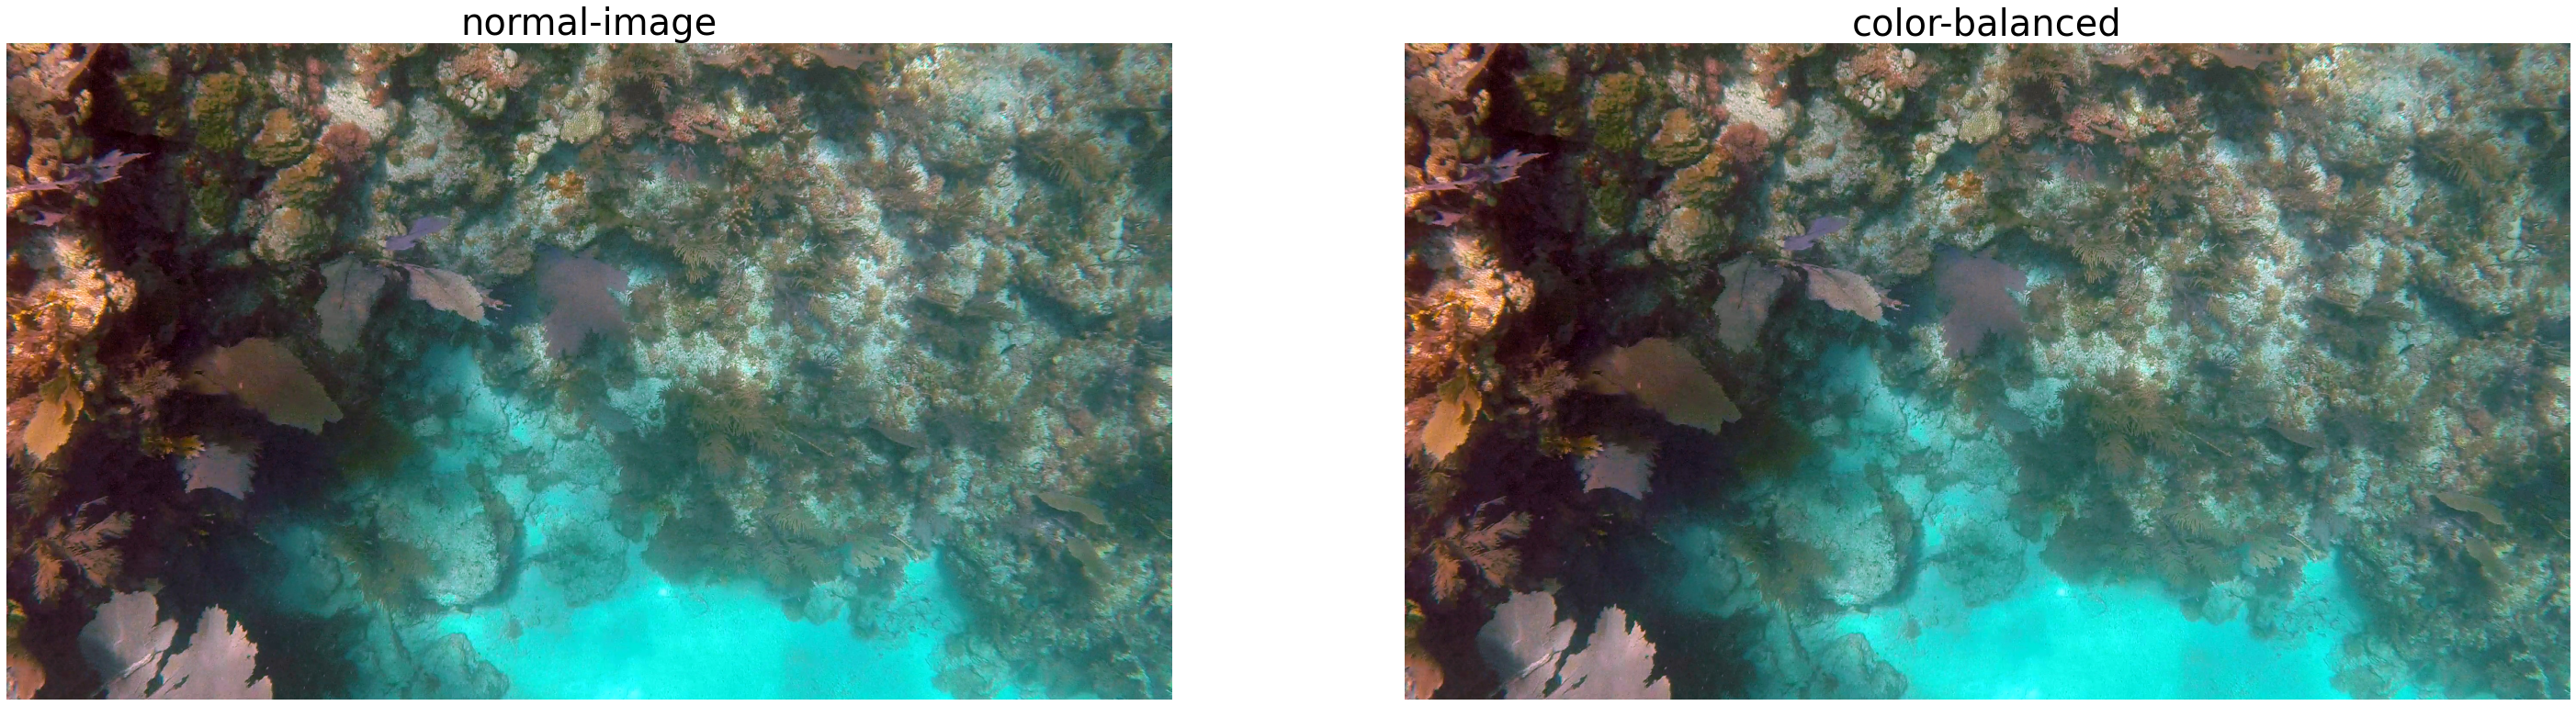

In [58]:
img_name = annotations_df.image.unique()[7]
img = cv2.imread(os.path.join(DATASET_IMAGE_PATH,img_name))

fig = plt.figure(figsize=(50,25))
ax1,ax2 = fig.subplots(nrows=1,ncols=2)
ax1.imshow(img[:,:,::-1])
ax1.axis('off')
ax1.set_title('normal-image',fontsize=40)

color_balanced_image = simple_colorbalance(img,200)

ax2.imshow(color_balanced_image[:,:,::-1])
ax2.axis('off')
ax2.set_title('color-balanced',fontsize=40)
plt.show()

os.makedirs('outputs',exist_ok=True)
fig.savefig(os.path.join('outputs',f'{img_name}.jpg'),dpi=100, bbox_inches='tight')

